## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [12]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, 2:5].values
print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

## Using elbow method to find optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

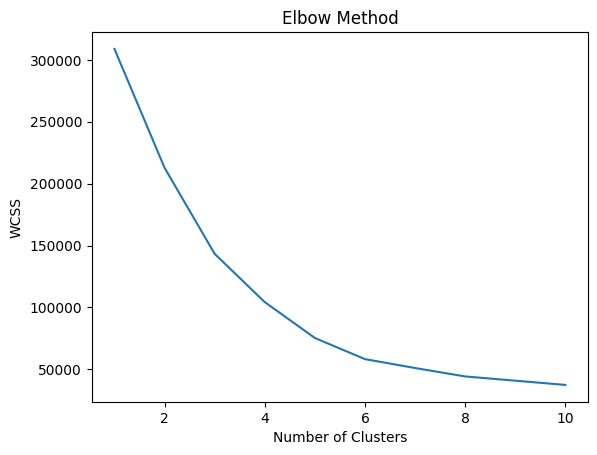

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Training K-Means model on dataset

In [14]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 2 3 0 4 0 3 2 4 4 4 2 4 4 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2
 2 4 2 4 4 2 2 4 2 2 4 2 2 4 4 2 2 4 2 4 4 4 2 4 2 4 4 2 2 4 2 4 2 2 2 2 2
 4 4 4 4 4 2 2 2 2 4 4 4 1 4 1 5 1 5 1 5 1 4 1 5 1 5 1 5 1 5 1 4 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualizing clusters

In [ ]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label="Centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual income ($K)")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.show()

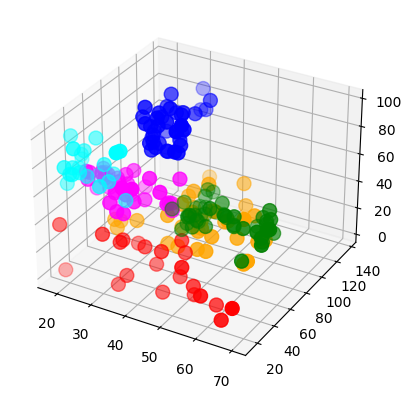

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], X[y_kmeans==0,2], s=100, c='red', label='Cluster 1')
ax.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], X[y_kmeans==1,2], s=100, c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], X[y_kmeans==2,2], s=100, c='green', label='Cluster 3')
ax.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], X[y_kmeans==3,2], s=100, c='cyan', label='Cluster 4')
ax.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], X[y_kmeans==4,2], s=100, c='magenta', label='Cluster 5')
ax.scatter(X[y_kmeans==5,0], X[y_kmeans==5,1], X[y_kmeans==5,2], s=100, c='orange', label='Cluster 6')

plt.show()